## Working with text data using Keras

Is there some ideal word-embedding model that would perfectly map human language and could be used for any NLP-task? Not really, although a few come quite close (e.g. Word2Vec and GloVe). In practice, what makes a word-embedding model depends heavily on your task at hand. <br>

The traditional bag-of-word model encoding schemes are large sparse vectors used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations are sparse (Finnish: harva) because the vocabularies are vast and a given word or document would be represented by a large vector comprised mostly of zero values. 

Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.

### Initiating an Embedding Layer
It can sometimes be reasonable to *learn* a new word-embedding model with every new task. This can be done through  backpropagation; it's about learning the weights of a layer: the **Embedding layer.** 

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

### Loading the IMDB data for use with an Embedding layer.

The sequences have different lengths and Keras prefers inputs to be vectorized and all inputs to have the same length. I will pad all input sequences to have the length of maxlen. 

In [13]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # nr of words to consider as features
maxlen = 300 # cuts off the text after this nr of words among the most common words, i.e. 'max_features'

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # turns the list of integers above into a 2D integer tensor of shape (samples, maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # (same as for x_train)

#### Slide from Coursera's Deep Learning Specialization, course: Sequence Models (by Andrew Ng)
Description of an Embedding matrix - E

![alt text](EmbeddingMatrix.JPG "Embedding matrix")

### Using an Embedding layer and classifier on the IMDB data.

From https://keras.io/layers/embeddings/     *Embedding (input_dim, output_dim,..., input_length)*

**input_dim** Size of the vocabulary, i.e. maximum integer index + 1.

**output_dim** Dimension of the dense embedding.--> Every word will be mapped onto a vector with, in this case, 8 elements. This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.

**input_length** Length of input sequences, when it is constant. This argument is required if you are going to connect 
 <Flatten> then <Dense> layers upstream (without it, the shape of the dense outputs cannot be computed).

 --> After the Embedding layer, the activations have shape (samples, maxlen, 8)

In [14]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 

# From https://keras.io/layers/embeddings/      Embedding (input_dim, output_dim,..., input_length)
# input_dim: Size of the vocabulary, i.e. maximum integer index + 1.
# output_dim: Dimension of the dense embedding.--> Every word will be mapped onto a vector with, in this case, 8 elements
# input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect 
# <Flatten> then <Dense> layers upstream (without it, the shape of the dense outputs cannot be computed).

# Specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs.
# --> After the Embedding layer, the activations have shape (samples, maxlen, 8)

model.add(Flatten()) # Flattens the 3D tensor of embeddings (=(samples, maxlen, 8)) into a 2D tensor of shape (samples,maxlen*8)

model.add(Dense(1, activation="sigmoid")) # Adds the classifier sigmoid on top (https://en.wikipedia.org/wiki/Sigmoid_function)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 8)            80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


### Number of Parameters

**Embedding** = vocabulary size i.e. input x output = 10.000 x 8 = 80.000

**Dense** = maxlen i.e. input_length x Output + 1 = 300 x 8 + 1 =2.401

*** Total params = 82.401***

In [15]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 106us/step - loss: 0.5900 - acc: 0.6975 - val_loss: 0.3958 - val_acc: 0.8448

You get a validation accuracy of around 75%, which is pretty good considering that only the first 20 words in every review is used. Running the model with the first 50, 100 and words gave accuracies of 81%, 85% and 89%. <br>
But this model treats each word in the input sequences separately, without considering inter-word relationships. Adding recurrent layers or 1D convolutional layers on top to learn feature that take into account each sequence as a whole.

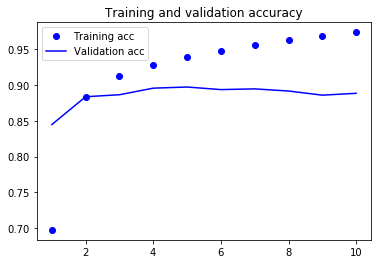

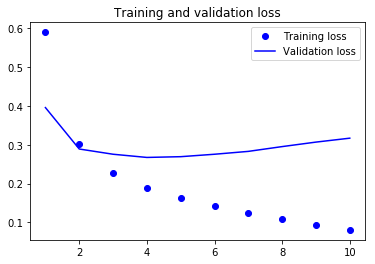

In [16]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Using Pretrained Word Embeddings
If not enough training data is available for learning word embeddings jointly with the problem you want to solve, you can use pretrained word embeddings.

First, downloading the IMDB data as raw text from http://mng.bz/0tIo <br>
The individual training reviews are collected into a list of strings, one string per review, and also the review labels (positive/negative) are collected into a *labels* list.

In [6]:
import os

imdb_dir = "C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning.ai_Coursera/SequenceModels/WorkingWithTextData/aclImdb"
train_dir = os.path.join(imdb_dir, "train")

#file = open("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning.ai_Coursera/SequenceModels/WorkingWithTextData/aclImdb/train", encoding="utf8")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            #f = open(os.path.join(dir_name, fname))
            # using code above gave: UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 194: character maps to <undefined>
            # added: encoding='utf-8'
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)                    
                

#### Tokenizing the data
Because pretrained word embeddings are meant to be particularily useful on problems where little data is available, I will restrict the traing data to the first 200 samples only. Let's see how well it works! 

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences
import numpy as np

maxlen = 100 # cuts off review after 100 words
training_samples = 200 # Trains on 200 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered: 
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### Downloading and Preprocessing the GloVe word embedding
file **glove.6B.zip** found in https://nlp.stanford.edu/projects/glove/ <br>
The entire GloVe word embedding file is loaded into memory as a dictionary of word to embedding array; embeddings_index = {}

In [8]:
glove_dir = "C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning.ai_Coursera/SequenceModels/WorkingWithTextData/data"

embeddings_index = {}

f = open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding='utf-8') #added , encoding='utf-8'
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


Next, an embedding matrix is needed that can be loaded into an Embedding layer. The matrix' shape must be (max_words, embedding_dim), which is has a shape of a 10000 x 100 matrix. GloVe is 100 x 400000.
#### Preparing the GloVe word embeddings matrix

In [12]:
embedding_dim = 100 # GloVe contains 100-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the mebedding index will all be zeros

#### Model Definition

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Number of Parameters

**Embedding** = vocabulary size i.e. input x output = 10.000 x 100 = 1.000.000

**Dense_2** = batch_size x maxlen i.e. input_length + (batch_size x 1) = 32 x 10.000 + (32 x 1) = 320.032

**Dense_3** = batch_size + 1

*** Total params = 1.320.065***

The Embedding layer now has a single weight matrix: a 2D float matrix where each entry *i* is the word vector meant to be associated with index *i*.
#### Loading pretrained word embedding into the Embeddig layer
Setting this to False makes sure the Embedding layer is non-trainable when calling it. 
If you were to set trainable = True, then it will allow the optimization algorithm to modify the values of the word embeddings.
Pretrained parts shouldn't be updated be during training, to avoid them forgetting what they already "know".

In [11]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 


#### Training and Evaluating the Model

In [12]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")        

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 1.6336 - acc: 0.5250 - val_loss: 0.7130 - val_acc: 0.5099
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7548 - acc: 0.5800 - val_loss: 0.6910 - val_acc: 0.5428
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5788 - acc: 0.7000 - val_loss: 0.9908 - val_acc: 0.4936
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6081 - acc: 0.6350 - val_loss: 0.7503 - val_acc: 0.5315
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4083 - acc: 0.8250 - val_loss: 0.7000 - val_acc: 0.5634
Epoch 6/10
200/200 [===

#### Plotting the Results

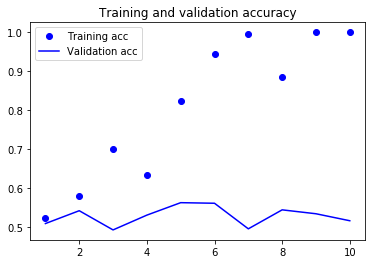

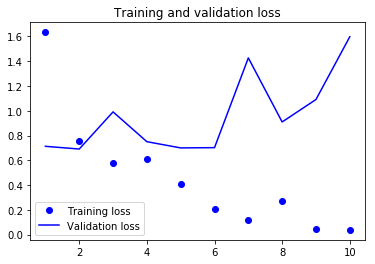

In [13]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

It can clearly be seen that the model quickly starts overfitting, which was expected given the small number of training samples. For the same reason Validation accuray has high variance. <br>
NOTE! If you run the model again without running the Model Definition -cell, the overfitting is even more severe, since we're using same data again! Training Accuracy jumps early to 100% and -Loss becomes quickly almost nonexistant (due to vanishing gradients?) <br><br>
The same model could also be trained without loading the pre-trained word embeddings (here GloVe). In that case, a task specificembedding is learned of the input tokens, which is generally more powerful, when lots of data is available. This way you can, in a way, tailormake your own model with your own data.

### A concrete LSTM example
#### Preparing the IMDB data

In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # nr of words to consider as features CUTTING THIS DOWN TO 1000 FROM 10.000!!!
maxlen = 500 # cuts off the text after this nr of words among the most common words, i.e. 'max_features' CUT FROM 500 TO 100 !!!
batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

input_train = input_train[:5000]
y_train = y_train[:5000]
input_test = input_test[:5000]
y_test = y_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

loading data ...
5000 train sequences
5000 test sequences
Pad sequences (samples x time)
input_train shape: (5000, 500)
input_test shape: (5000,)


The original data set of 25.000 samples, divided into 20.000 training sequences and 5.000 validation sequences, turned out to be too heavy for my laptop's CPU, so I cut the training and test sets by 80%; from 20.000 & 5.000 samples to 4.000 & 1.000. 

In [15]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 15s 4ms/step - loss: 0.7058 - acc: 0.5795 - val_loss: 0.6604 - val_acc: 0.7330

Despite the drastically smaller datasets the LSTM model performs surprisingly well!

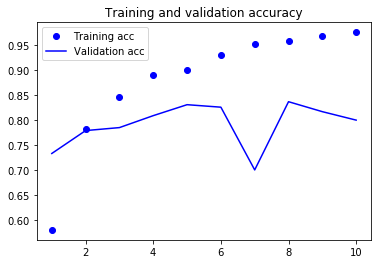

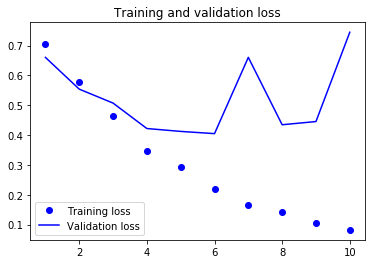

In [16]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Summary of graphs 
- not fully comparable with each other due to various inputs/amounts of data in the three models

![alt text](SummaryOfGraphs.jpg "")